## MD simulation of a system of 500 particles interacting via Lennard-Jonnes Potential. Equilibrate the system and calculate radial distribution function.


# Theory

Molecular dynamic simulation is a classical many body problem where position and momentum of a particle can be calculated simultaneously. As all particles behave in a deterministic way, we can simulate it in a computer using necessary algorithms.

The Lennard-Jones potential is an intermolecular pair potential. Out of all the intermolecular potentials, the Lennard-Jones potential is the one that has been the most extensively studied. It is considered an archetype modelfor simple yet realistic intermolecular interactions. The Lennard-Jones potential models soft repulsive and attractive interactions. Hence, the Lennard-Jones potential describes electronically neutral atoms or molecules. It is named after John Lennard-Jones.

# Algorithms

1. Generate random uniform distribution of array of 500 × 3 within range which is position matrix of particles. Where each row representing different particles and column 0,1,2 are representing x, y, z coordinates of particles.

2. Do the same for velocity coordinates of particles.

3. Determine the distance matrix(rij ) of the position matrix.

Note: In mathematics, computer science and especially graph theory, a distance
matrix is a square matrix (two-dimensional array) containing the distances, taken
pairwise, between the elements of a set.

4. Calculate 1/rij of each element of the distance matrix and remove divide by zero using necessary code.

5. Calculate fx, fy, fz using formula given above and sum row wise to get total force by all particles.
Note: After this operation we will get a force array of shape 500 × 3. Which
can be used easily to update position and velocity arrays(or matrix).

6. Update position and velocity arrays by Verlet approximation method.
7. Repeat 3 to 6 several times to achieve equilibrium.

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import math
plt.style.use('dark_background')

In [29]:
class MD:
    def __init__(self):
        self.particle_number = 500
        self.dimentions = 2
        self.pos = np.zeros((self.particle_number,self.dimentions))
        self.vel = np.zeros((self.particle_number,self.dimentions))  
        self.box = 300
        self.KB = 1 
        self.T = 1
        self.M =1
        self.eps = 1
        self.sigma = 1
        self.steps = 100
        self.step_time = 0.075
        self.mass = 1
        self.bins =12
    def position(self):
        self.pos = np.random.random_sample((self.particle_number,self.dimentions))*self.box
        return (self.pos)
#     position of particles defined randomly ,a sample output for 10 particles in 2 dimetions:
    def velocity(self):
        Average_velocity = math.sqrt(self.KB * self.T / self.M)
        self.vel = np.random.normal(loc=Average_velocity,scale = 0.1 ,
        size = ((self.particle_number,self.dimentions)))
        return (self.vel)       

    def force_pair(self,p1,p2):
        r = self.pos[p1] - self.pos[p2]
        r_mag = np.linalg.norm(r) 
        r_cap = r/r_mag
        f_mag = 24*self.eps/r_mag * (2*((self.sigma/r_mag)**12) - (self.sigma/r_mag)**6)
        return (f_mag * r_cap)
    
    def force_on_p(self,p):
        force = np.zeros(2)
        for i in range(self.particle_number):
            if (i == p):
                continue
            force += self.force_pair(p,i) 
        return force
    
    def integrate(self):
        for i in range(self.steps):
            forces = np.array([self.force_on_p(p) for p in range(self.particle_number)])
            self.pos = self.pos + self.vel * self.step_time
            for i in range(self.particle_number):
                if self.pos[i][0]<0 or self.pos[i][0]>self.box:
                    self.pos[i][0] = np.random.random_sample() *30
                if self.pos[i][1]<0 or self.pos[i][1]>self.box:
                    self.pos[i][1] = np.random.random_sample() *30
            self.vel = self.vel + (forces/self.mass) * self.step_time
        return self.pos
    
    def draw_particles(self):
        plt.figure(figsize=(5,5))
        axis = plt.gca()
        axis.set_xlim(-10,self.box+10)
        axis.set_ylim(-10,self.box+10)
        for i in range(self.particle_number):
            axis.add_patch( plt.Circle(self.pos[i], radius=5,linewidth=2, edgecolor='black') )
        plt.show()
        
    def radial_probabilty(self):
        particle = np.random.randint(1,self.particle_number)
        radial = []
        r = [self.box/2,self.box/2]
        for i in range(self.particle_number):
            r_sub = r - self.pos[i]
            d_sub = np.linalg.norm(r_sub) 
            if d_sub <= self.box/2 :
                radial.append(d_sub)
        f1,f2 = np.histogram(radial,bins=self.bins,density=False)
        r1 = np.linspace(0,self.box/2,self.bins+1)
        rq = []
        for i in range(len(r1)-1):
            rq = rq + [r1[i+1]**3 - r1[i]**3]
        r=[]
        for i in range (len(f2)-1):
            rz = f2[i] + (f2[i+1]-f2[i])/2
            r.append(rz)
        rq = np.array(rq)
        rdf = np.divide(f1,rq)
        plt.figure()
        plt.plot(r,rdf)
        plt.scatter(r,rdf)
        plt.ylabel('Number density of particles')
        plt.xlabel('radius(in nm)')
        plt.show()
#         return rq
#         return r

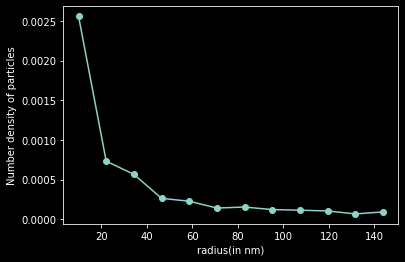

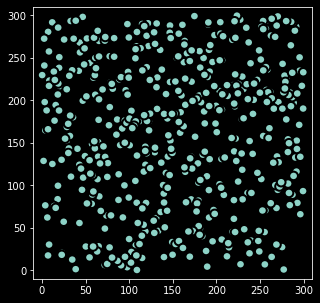

In [30]:
M=MD()
M.position()
M.velocity()
M.radial_probabilty()
M.draw_particles()

In [4]:
M.integrate()

array([[1.83482569e+02, 2.86742436e+02],
       [2.37276549e+02, 9.47176613e+01],
       [1.49868128e+02, 4.93790155e+01],
       [1.65296332e+02, 1.71394986e+02],
       [2.63298271e+01, 3.96225224e+01],
       [1.55933971e+02, 5.16160898e+01],
       [1.54922885e+02, 2.32398328e+02],
       [3.94713556e+01, 2.80607349e+02],
       [2.31056552e+01, 1.65976598e+02],
       [3.58354548e+01, 2.24224799e+02],
       [1.66962825e+02, 2.22977448e+02],
       [9.97019547e+00, 2.70719941e+02],
       [6.61727516e+01, 2.44620335e+02],
       [6.09740651e+01, 3.93004820e+00],
       [2.41056567e+02, 2.67360909e+02],
       [2.62758919e+02, 1.10535826e+02],
       [1.00564478e+01, 2.07583112e+02],
       [3.01730132e+01, 1.40871765e+02],
       [1.44653621e+02, 2.57070585e+02],
       [1.50964819e+01, 2.65969043e+02],
       [1.84462273e+02, 5.33275916e+01],
       [1.53891409e+02, 2.46206261e+02],
       [1.71893026e+02, 5.23021509e+01],
       [4.03459509e+01, 8.45421851e+01],
       [2.167154

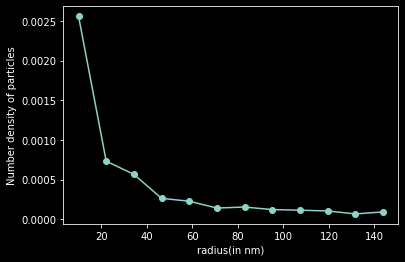

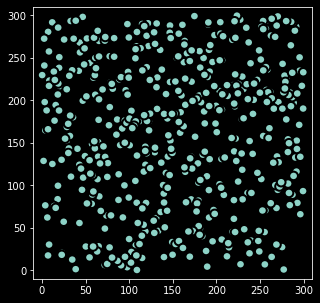

In [31]:
M.radial_probabilty()
M.draw_particles()

# Conclusion

1. Radial distribution function should be constant but I got a fluctuating result. Maybe this happened due to 500 particles which is a small number compared to the real world.
2. I was forced to use m = 1 because it was exceeding my computer’s computing power.